<a href="https://colab.research.google.com/github/Pepe9793/ML_Experiments/blob/main/Experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [324]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [325]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [326]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7532467532467533


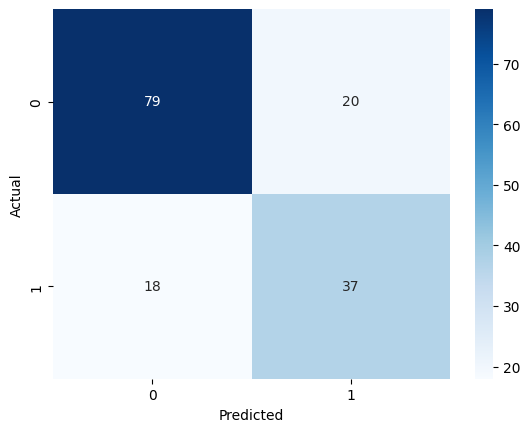

In [327]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [328]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [329]:
coeff_df = pd.DataFrame(model.coef_[0], X.columns, columns=["Coefficient"])
coeff_df


,Coefficient
Pregnancies,0.216242
Glucose,1.069330
BloodPressure,-0.258676
SkinThickness,0.047203
Insulin,-0.198998
BMI,0.792371
DiabetesPedigreeFunction,0.227094
Age,0.430362


## Experiment Result Report

### Model Performance

The Logistic Regression model achieved an **accuracy of 0.753** on the test set.

### Confusion Matrix

The confusion matrix visualizes the performance of the classification model:

*   **True Negatives (TN):** 79 (Correctly predicted as 0 - No Diabetes)
*   **False Positives (FP):** 20 (Incorrectly predicted as 1 - Diabetes, but actually 0 - No Diabetes)
*   **False Negatives (FN):** 18 (Incorrectly predicted as 0 - No Diabetes, but actually 1 - Diabetes)
*   **True Positives (TP):** 37 (Correctly predicted as 1 - Diabetes)

### Classification Report

The classification report provides a detailed breakdown of precision, recall, and f1-score for each class:

```
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154
```

**Interpretation:**

*   **Class 0 (No Diabetes):** The model has a high precision (81%) and recall (80%), meaning it is good at identifying individuals without diabetes.
*   **Class 1 (Diabetes):** The model has a lower precision (65%) and recall (67%), indicating more room for improvement in correctly identifying individuals with diabetes.

### Logistic Regression Coefficients

The coefficients indicate the strength and direction of the relationship between each feature and the log-odds of the 'Outcome' (diabetes presence). A positive coefficient means that as the feature value increases, the likelihood of diabetes increases, and vice versa for negative coefficients.

```
                          Coefficient
Pregnancies                  0.216242
Glucose                      1.069330
BloodPressure               -0.258676
SkinThickness                0.047203
Insulin                     -0.198998
BMI                          0.792371
DiabetesPedigreeFunction     0.227094
Age                          0.430362
```

**Key Observations from Coefficients:**

*   **Glucose** has the largest positive coefficient (1.069), suggesting it is the strongest predictor for diabetes among the features. Higher glucose levels are strongly associated with a higher likelihood of diabetes.
*   **BMI** also shows a significant positive correlation (0.792) with the likelihood of diabetes.
*   **Pregnancies, DiabetesPedigreeFunction, and Age** also have positive, though smaller, coefficients.
*   **BloodPressure and Insulin** have negative coefficients, implying that higher values of these features are associated with a slightly lower likelihood of diabetes, which might be counter-intuitive for insulin and warrants further investigation (e.g., handling zero insulin values or interactions).
